# Práctica 3

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## Maldición de Dimensionalidad

Usando el dataset de estaturas aplicar detección de anomalías

1. Usar el dataset de precios de casas

2. Usar "PolynomialFeatures" para calcular features polinómicas y analizar la dimensionalidad resultante al usar polinomios de grado 2 y 3 para 1, 2 y 3 variables de entrada (es irrelevante la variable seleccionada)

3. No entrenar ningún modelo, solo analizar el comportamiento del número de dimensiones (por ejemplo, utilizando plots comparativos).


In [17]:
from sklearn.preprocessing import PolynomialFeatures

# Se cargan los datos
dataset = pd.read_csv("train.csv")

# Lista con variables de entrada
input_vars = [["longitude"],
              ["longitude", "total_rooms"],
              ["longitude", "total_rooms", "households"]]

# Se itera sobre cada conjunto de variables
for input_var in input_vars:

    for deg in range(2,5):

        # Se extraen las variables de entrada
        var_data = dataset[input_var].to_numpy()

        # Los datos se tornan bidimensionales de ser necesario
        if len(var_data.shape) < 2:
            var_data = np.reshape(var_data, (-1, 1))

        # Se calculan las polinomial features
        var_data_exp = PolynomialFeatures(degree = deg).fit_transform(var_data)
        
        # Se imprime el número de features resultantes
        print(f"No Variables Entrada: {len(input_var)} | Grados: {deg} | No Nuevas Features: {var_data_exp.shape[1]}")


No Variables Entrada: 1 | Grados: 2 | No Nuevas Features: 3
No Variables Entrada: 1 | Grados: 3 | No Nuevas Features: 4
No Variables Entrada: 1 | Grados: 4 | No Nuevas Features: 5
No Variables Entrada: 2 | Grados: 2 | No Nuevas Features: 6
No Variables Entrada: 2 | Grados: 3 | No Nuevas Features: 10
No Variables Entrada: 2 | Grados: 4 | No Nuevas Features: 15
No Variables Entrada: 3 | Grados: 2 | No Nuevas Features: 10
No Variables Entrada: 3 | Grados: 3 | No Nuevas Features: 20
No Variables Entrada: 3 | Grados: 4 | No Nuevas Features: 35


El patrón de incremento de dimensionalidad para 3 features de entrada parece ser de 10, 20 y 35, para 2, 3 y 4 grados respectivamente. Dada esta información podemos concluir que si $m$ consiste del número de features de entrada, y $n$ consiste del grado utilizado para la expansión, el número de dimensiones de salida será igual a 

$$\left(\begin{array}{c}n+m \\ n\end{array}\right)$$

Dado que esta expresión consiste de una combinación, se puede establecer que esta equivale a

$$\left(\begin{array}{c}n+m \\ n\end{array}\right) = \frac{(n+m) !}{n !((n+m)-n) !} = \frac{(n+m) !}{n ! m !}$$

Podemos graficar esta función al realizar un barrido de valores para tanto $n$ como $m$. De esta manera podemos ser testigos de lo rápido que comienza a crecer la dimensionalidad conforme se incrementan los parámetros

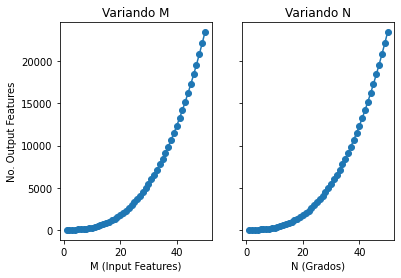

In [26]:
from scipy.special import factorial

# Se deja fijo el grado y se hace un barrido de valores para
# el número de features de entrada
n = 3
m = np.linspace(1, 50, 50)

# Se calcula el número de features de salida bajo las condiciones previas
outputFeat_m = factorial(n + m) / (factorial(n) * factorial(m)) 

# Se calcula el número de features de salida dejando el número de
# features de entrada fijo y barriendo el grado
n = np.linspace(1, 50, 50)
m = 3
outputFeat_n = factorial(n + m) / (factorial(n) * factorial(m)) 

# Se redefinen "M" y "N" como barridos de parámetros
m = np.linspace(1, 50, 50)
n = np.linspace(1, 50, 50)

# Se crean dos subplots
f, axs = plt.subplots(1,2)

axs[0].plot(m, outputFeat_m)
axs[0].scatter(m, outputFeat_m)
axs[0].set_title("Variando M")
axs[0].set_xlabel("M (Input Features)")
axs[1].plot(n, outputFeat_n)
axs[1].scatter(n, outputFeat_n)
axs[1].set_title("Variando N")
axs[1].set_xlabel("N (Grados)")

# Solo se incluyen las X y Y labels para los plots extremos
for ax in axs.flat:
    ax.set(ylabel='No. Output Features')

# Se eliminan los ticks entre gráficas, solo se mantienen los ticks extremos
for ax in axs.flat:
    ax.label_outer()

# Se despliega la gráfica
plt.show()

Como se puede observar, el número de features de salida presenta el mismo ritmo de incremento exponencial tanto si se incrementa el número de features de entrada, o si se incrementa el número de grados. De aquí la razón por la que se le llama "the curse of dimensionality". En este caso, a medida que incrementamos linealmente el volumen de información de entrada, la cantidad de información de salida incrementa de manera exponencial, causando que rápidamente la cantidad de información se torne in-manejable (¿Cómo manipular data con 50 features de entrada y expandida a casi 30000 de salida? Es una situación complicada en la que se debe recurrir a utilizar arquitecturas especializadas o supercomputadoras.)